In [101]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Read into the sugar dataset

In [102]:
df_sugar = pd.read_csv ('../data/psd_sugar.csv')

In [103]:
df_sugar.head(1)

,Commodity_Code,Commodity_Description,Country_Code,Country_Name,Market_Year,Calendar_Year,Month,Attribute_ID,Attribute_Description,Unit_ID,Unit_Description,Value
0,612000,"Sugar, Centrifugal",AF,Afghanistan,1973,1972,0,139,Human Dom. Consumption,8,(1000 MT),0


## drop columns

In [104]:
df_sugar = df_sugar.drop(columns = {'Commodity_Code', 'Market_Year', 'Month', 'Attribute_ID', 'Unit_ID'})

In [105]:
df_sugar

,Commodity_Description,Country_Code,Country_Name,Calendar_Year,Attribute_Description,Unit_Description,Value
0,"Sugar, Centrifugal",AF,Afghanistan,1972,Human Dom. Consumption,(1000 MT),0
1,"Sugar, Centrifugal",AF,Afghanistan,1973,Human Dom. Consumption,(1000 MT),60
2,"Sugar, Centrifugal",AF,Afghanistan,1974,Human Dom. Consumption,(1000 MT),60
3,"Sugar, Centrifugal",AF,Afghanistan,1975,Human Dom. Consumption,(1000 MT),55
4,"Sugar, Centrifugal",AF,Afghanistan,1976,Human Dom. Consumption,(1000 MT),60
...,...,...,...,...,...,...,...
8668,"Sugar, Centrifugal",RH,Zimbabwe,2017,Human Dom. Consumption,(1000 MT),343
8669,"Sugar, Centrifugal",RH,Zimbabwe,2018,Human Dom. Consumption,(1000 MT),330
8670,"Sugar, Centrifugal",RH,Zimbabwe,2020,Human Dom. Consumption,(1000 MT),397
8671,"Sugar, Centrifugal",RH,Zimbabwe,2020,Human Dom. Consumption,(1000 MT),350


## Read into the population dataset

In [106]:
df_pop = pd.read_csv ('../data/population_clean_1960.csv')
df_pop

,Country Name,Country Code,year,population
0,Aruba,ABW,1960,54211.0
1,Aruba,ABW,1961,55438.0
2,Aruba,ABW,1962,56225.0
3,Aruba,ABW,1963,56695.0
4,Aruba,ABW,1964,57032.0
...,...,...,...,...
15123,Zimbabwe,ZWE,2016,14030390.0
15124,Zimbabwe,ZWE,2017,14236745.0
15125,Zimbabwe,ZWE,2018,14439018.0
15126,Zimbabwe,ZWE,2019,14645468.0


## Merge both df

In [107]:
df_merge = pd.merge(df_sugar, df_pop, left_on = ['Country_Name', 'Calendar_Year'], right_on = ['Country Name', 'year' ], how = 'left')

In [108]:
df_merge

,Commodity_Description,Country_Code,Country_Name,Calendar_Year,Attribute_Description,Unit_Description,Value,Country Name,Country Code,year,population
0,"Sugar, Centrifugal",AF,Afghanistan,1972,Human Dom. Consumption,(1000 MT),0,Afghanistan,AFG,1972.0,11791215.0
1,"Sugar, Centrifugal",AF,Afghanistan,1973,Human Dom. Consumption,(1000 MT),60,Afghanistan,AFG,1973.0,12108963.0
2,"Sugar, Centrifugal",AF,Afghanistan,1974,Human Dom. Consumption,(1000 MT),60,Afghanistan,AFG,1974.0,12412950.0
3,"Sugar, Centrifugal",AF,Afghanistan,1975,Human Dom. Consumption,(1000 MT),55,Afghanistan,AFG,1975.0,12689160.0
4,"Sugar, Centrifugal",AF,Afghanistan,1976,Human Dom. Consumption,(1000 MT),60,Afghanistan,AFG,1976.0,12943093.0
...,...,...,...,...,...,...,...,...,...,...,...
8668,"Sugar, Centrifugal",RH,Zimbabwe,2017,Human Dom. Consumption,(1000 MT),343,Zimbabwe,ZWE,2017.0,14236745.0
8669,"Sugar, Centrifugal",RH,Zimbabwe,2018,Human Dom. Consumption,(1000 MT),330,Zimbabwe,ZWE,2018.0,14439018.0
8670,"Sugar, Centrifugal",RH,Zimbabwe,2020,Human Dom. Consumption,(1000 MT),397,Zimbabwe,ZWE,2020.0,0.0
8671,"Sugar, Centrifugal",RH,Zimbabwe,2020,Human Dom. Consumption,(1000 MT),350,Zimbabwe,ZWE,2020.0,0.0


## create a column for the consumption of sugar per capita

In [133]:
df_merge['per_capita'] = df_merge['Value'] / df_merge['population'] * 100
df_merge.head()

,Commodity_Description,Country_Code,Country_Name,Calendar_Year,Attribute_Description,Unit_Description,Value,Country Name,Country Code,year,population,per_capita
0,"Sugar, Centrifugal",AF,Afghanistan,1972,Human Dom. Consumption,(1000 MT),0,Afghanistan,AFG,1972.0,11791215.0,0.000000
1,"Sugar, Centrifugal",AF,Afghanistan,1973,Human Dom. Consumption,(1000 MT),60,Afghanistan,AFG,1973.0,12108963.0,0.000496
2,"Sugar, Centrifugal",AF,Afghanistan,1974,Human Dom. Consumption,(1000 MT),60,Afghanistan,AFG,1974.0,12412950.0,0.000483
3,"Sugar, Centrifugal",AF,Afghanistan,1975,Human Dom. Consumption,(1000 MT),55,Afghanistan,AFG,1975.0,12689160.0,0.000433
4,"Sugar, Centrifugal",AF,Afghanistan,1976,Human Dom. Consumption,(1000 MT),60,Afghanistan,AFG,1976.0,12943093.0,0.000464


## subset  USA

In [110]:
df_USA = df_merge[df_merge['Country_Name'] == 'United States']
df_USA.head()

,Commodity_Description,Country_Code,Country_Name,Calendar_Year,Attribute_Description,Unit_Description,Value,Country Name,Country Code,year,population,per_capita
8170,"Sugar, Centrifugal",US,United States,1959,Human Dom. Consumption,(1000 MT),8671,NaN,NaN,NaN,NaN,NaN
8171,"Sugar, Centrifugal",US,United States,1960,Human Dom. Consumption,(1000 MT),8868,United States,USA,1960.0,180671000.0,0.004908
8172,"Sugar, Centrifugal",US,United States,1961,Human Dom. Consumption,(1000 MT),9106,United States,USA,1961.0,183691000.0,0.004957
8173,"Sugar, Centrifugal",US,United States,1962,Human Dom. Consumption,(1000 MT),9150,United States,USA,1962.0,186538000.0,0.004905
8174,"Sugar, Centrifugal",US,United States,1963,Human Dom. Consumption,(1000 MT),9194,United States,USA,1963.0,189242000.0,0.004858


## plot the consumption of sugar per capita for the US

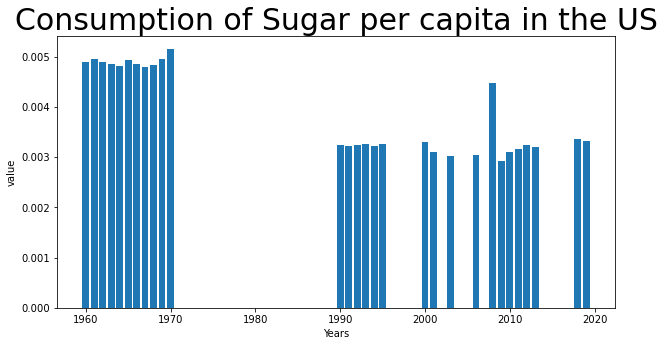

In [111]:
plt.bar(df_USA.Calendar_Year, df_USA.per_capita, linewidth=2)
plt.rcParams["figure.figsize"] = [15,10]
#plt.xticks(range(30))
plt.xlabel('Years')
plt.ylabel('value')
plt.title('Consumption of Sugar per capita in the US', size = 30)
plt.show()

## subset India

In [128]:
df_IN = df_merge[df_merge['Country_Name'] == 'India']
df_IN.head()

,Commodity_Description,Country_Code,Country_Name,Calendar_Year,Attribute_Description,Unit_Description,Value,Country Name,Country Code,year,population,per_capita
3774,"Sugar, Centrifugal",IN,India,1959,Human Dom. Consumption,(1000 MT),2269,NaN,NaN,NaN,NaN,NaN
3775,"Sugar, Centrifugal",IN,India,1960,Human Dom. Consumption,(1000 MT),2513,India,IND,1960.0,450547679.0,0.000558
3776,"Sugar, Centrifugal",IN,India,1961,Human Dom. Consumption,(1000 MT),2503,India,IND,1961.0,459642165.0,0.000545
3777,"Sugar, Centrifugal",IN,India,1962,Human Dom. Consumption,(1000 MT),2833,India,IND,1962.0,469077190.0,0.000604
3778,"Sugar, Centrifugal",IN,India,1963,Human Dom. Consumption,(1000 MT),2595,India,IND,1963.0,478825608.0,0.000542


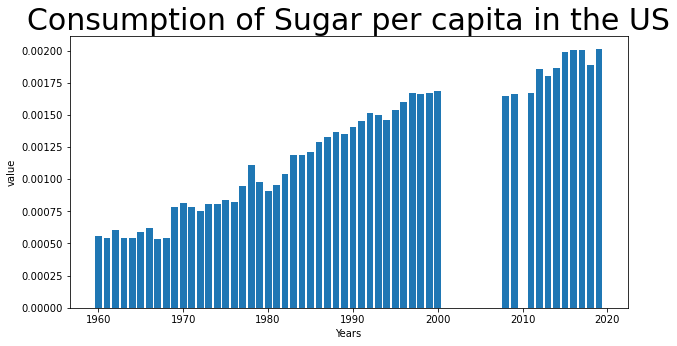

In [129]:
plt.bar(df_IN.Calendar_Year, df_IN.per_capita, linewidth=2)
plt.rcParams["figure.figsize"] = [10,5]
#plt.xticks(range(30))
plt.xlabel('Years')
plt.ylabel('value')
plt.title('Consumption of Sugar per capita in the US', size = 30)
plt.show()

## let's compare the sugar consumption / sugar consumption per capita / population

In [130]:
# consumption per capita
df_IN = df_merge[df_merge['Country_Name'] == 'India']
df_IN.head()

,Commodity_Description,Country_Code,Country_Name,Calendar_Year,Attribute_Description,Unit_Description,Value,Country Name,Country Code,year,population,per_capita
3774,"Sugar, Centrifugal",IN,India,1959,Human Dom. Consumption,(1000 MT),2269,NaN,NaN,NaN,NaN,NaN
3775,"Sugar, Centrifugal",IN,India,1960,Human Dom. Consumption,(1000 MT),2513,India,IND,1960.0,450547679.0,0.000558
3776,"Sugar, Centrifugal",IN,India,1961,Human Dom. Consumption,(1000 MT),2503,India,IND,1961.0,459642165.0,0.000545
3777,"Sugar, Centrifugal",IN,India,1962,Human Dom. Consumption,(1000 MT),2833,India,IND,1962.0,469077190.0,0.000604
3778,"Sugar, Centrifugal",IN,India,1963,Human Dom. Consumption,(1000 MT),2595,India,IND,1963.0,478825608.0,0.000542


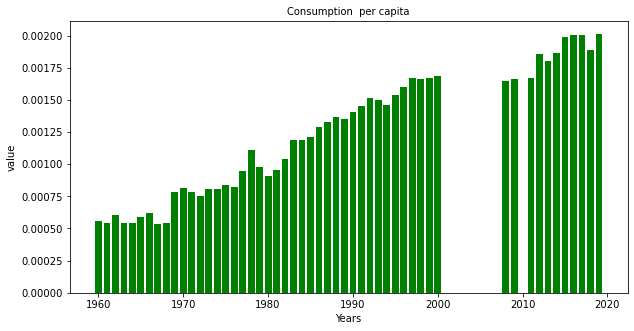

In [131]:
plt.bar(df_IN.Calendar_Year, df_IN.per_capita, color = 'green',  linewidth=2)
plt.rcParams["figure.figsize"] = [10,5]
#plt.xticks(range(30))
plt.xlabel('Years')
plt.ylabel('value')
plt.title('Consumption  per capita', size = 10)
plt.show()

In [116]:
# consumption in India
df_sugar_IN = df_sugar[df_sugar['Country_Name'] == 'India']
df_sugar_IN.head(1)

,Commodity_Description,Country_Code,Country_Name,Calendar_Year,Attribute_Description,Unit_Description,Value
3774,"Sugar, Centrifugal",IN,India,1959,Human Dom. Consumption,(1000 MT),2269


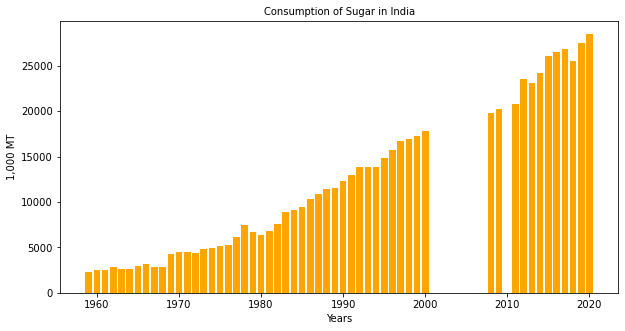

In [126]:
plt.bar(df_sugar_IN.Calendar_Year, df_sugar_IN.Value, linewidth=2, color = 'orange')
plt.rcParams["figure.figsize"] = [10,5]
#plt.xticks(range(30))
plt.xlabel('Years')
plt.ylabel('1,000 MT')
plt.title('Consumption of Sugar in India', size = 10)
plt.show()

In [118]:
# population in India
df_pop_IN = df_pop[df_pop['Country Name'] == 'India']
df_pop_IN.head(1)

,Country Name,Country Code,year,population
6100,India,IND,1960,450547679.0


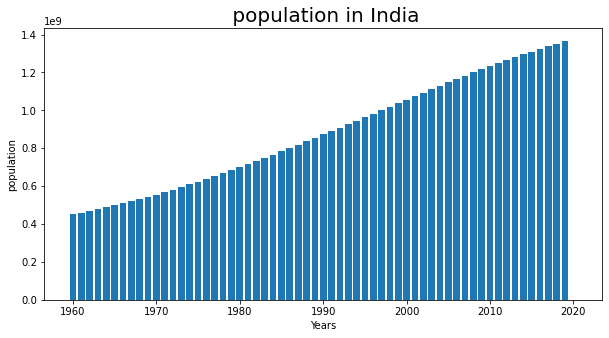

In [119]:
plt.bar(df_pop_IN.year, df_pop_IN.population, linewidth=2)
plt.rcParams["figure.figsize"] = [10,5]
#plt.xticks(range(30))
plt.xlabel('Years')
plt.ylabel('population')
plt.title(' population in India', size = 20)
plt.show()

## plot all 3

<BarContainer object of 61 artists>

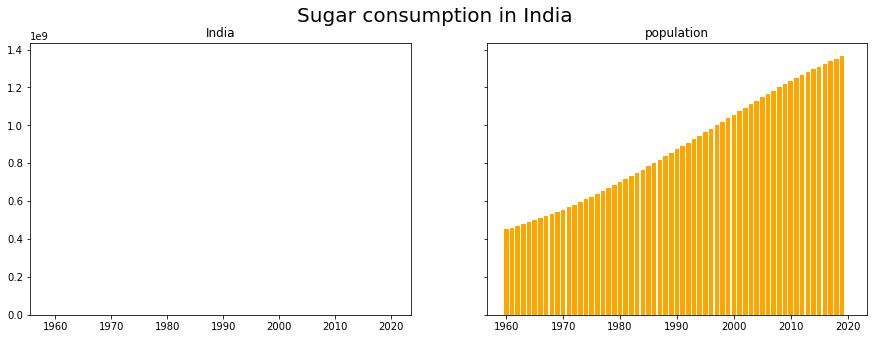

In [120]:
fig, (ax2, ax3) = plt.subplots(nrows = 1, ncols = 2, sharey = True, figsize = (15,5))
fig.suptitle('Sugar consumption in India', size = 20)
#ax1.set_title('USA')
#ax1.bar(df_IN.Calendar_Year, df_IN.per_capita)

ax2.set_title('India')
ax2.bar(df_sugar_IN.Calendar_Year, df_sugar_IN.Value, color = 'green')

ax3.set_title('population')
ax3.bar(df_pop_IN.year, df_pop_IN.population, color = 'orange')


NameError: name 'df_sugar_cons_USA' is not defined

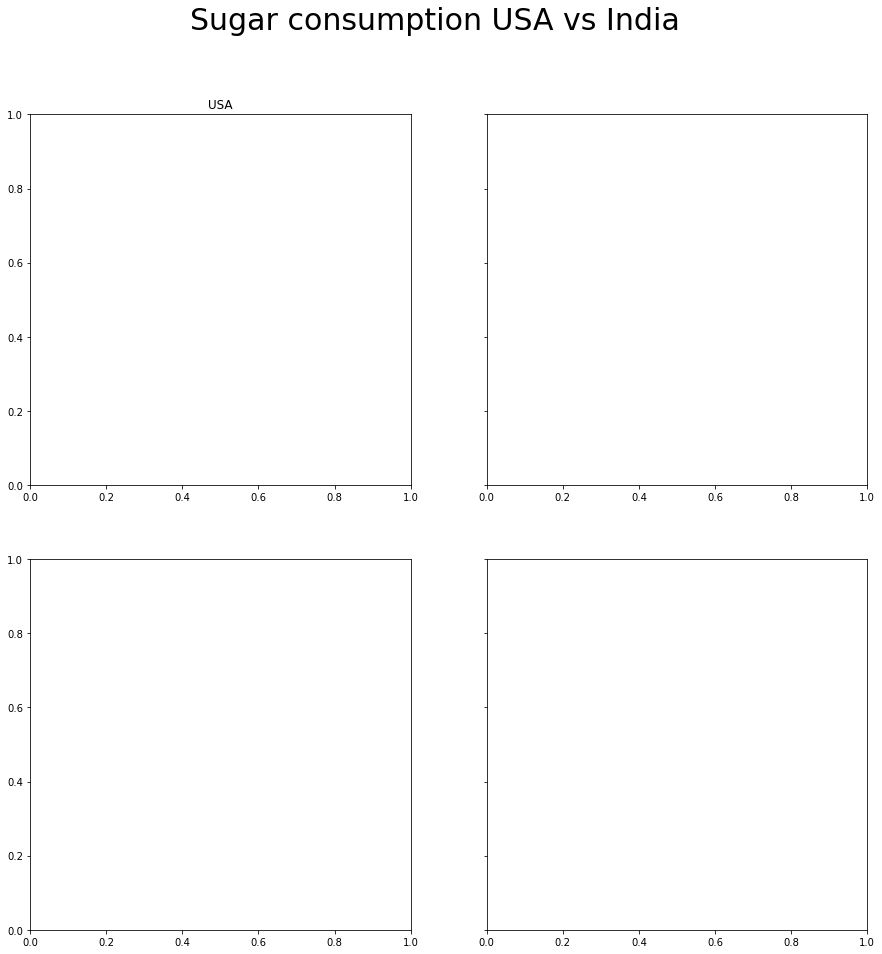

In [121]:
fig, ((ax1, ax2), (ax3,ax4)) = plt.subplots(nrows = 2, ncols = 2, sharey = True, figsize = (15,15))
fig.suptitle('Sugar consumption USA vs India', size = 30)
ax1.set_title('USA')
ax1.bar(df_sugar_cons_USA.Calendar_Year, df_sugar_cons_USA.Value)

ax2.set_title('India')
ax2.bar(df_sugar_cons_IN.Calendar_Year, df_sugar_cons_IN.Value, color = 'green')

ax3.set_title('China')
ax3.bar(df_sugar_cons_China.Calendar_Year, df_sugar_cons_China.Value, color = 'orange')

ax4.set_title('EU')
ax4.bar(df_sugar_cons_EU.Calendar_Year, df_sugar_cons_EU.Value, color = 'violet')